In [1]:
# import the required packages

import numpy as np
import pandas as pd
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.simplefilter("ignore")

In [2]:
# importing the dataset

df = pd.read_csv("matches.csv")
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# checking the number of rows and columns

df.shape

(756, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# to check the number of the null values

df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
# removing column "umpire3" because it has null value comparable to the total number of rows

df = df.drop(["umpire3"], axis= "columns")

In [7]:
# checking unique values in the column "Season"

df["Season"].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

Text(0, 0.5, 'Number of matchs')

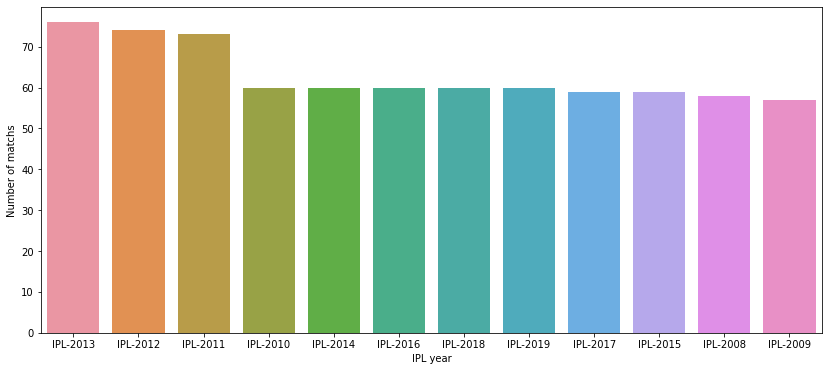

In [8]:
# number of matchs played in each season

season = df["Season"].value_counts()

plt.figure(figsize= (14, 6))
sns.barplot(season.index, season)
plt.xlabel("IPL year")
plt.ylabel("Number of matchs")

Text(0, 0.5, 'City Name')

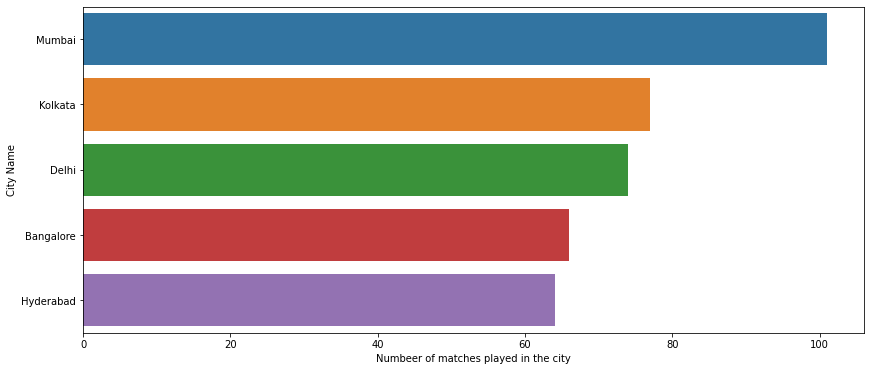

In [9]:
#Number of matches played in the top 5 cities

cities = df["city"].value_counts().nlargest(5)

plt.figure(figsize= (14, 6))
sns.barplot(cities, cities.index)
plt.xlabel("Numbeer of matches played in the city")
plt.ylabel("City Name")

Text(0, 0.5, 'Teams Name')

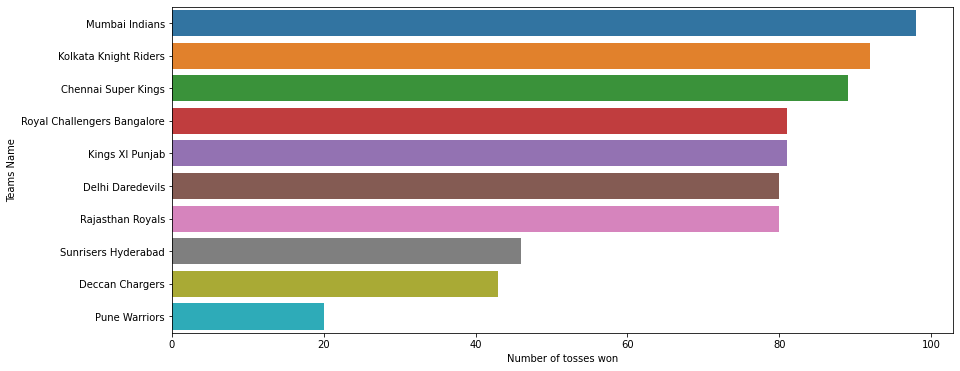

In [10]:
#most teams that win the toss

toss = df["toss_winner"].value_counts().nlargest(10)
plt.figure(figsize= (14, 6))

sns.barplot(toss, toss.index)
plt.xlabel("Number of tosses won")
plt.ylabel("Teams Name")

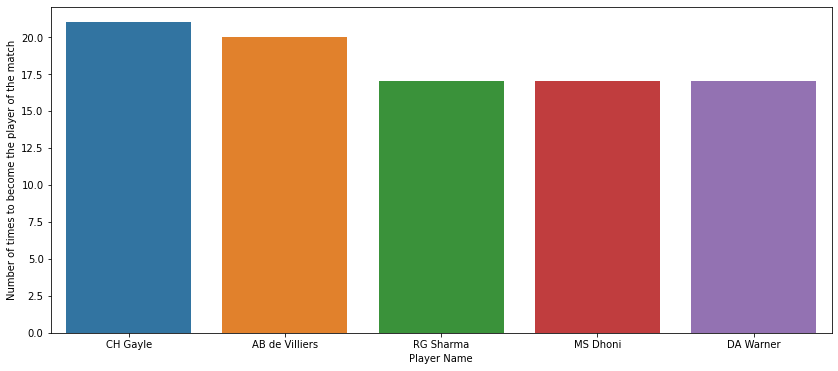

In [11]:
# top 5 players to become the player of the match

pom = df["player_of_match"].value_counts().nlargest(5)
plt.figure(figsize= (14, 6));
sns.barplot(pom.index, pom)
plt.xlabel("Player Name")
plt.ylabel("Number of times to become the player of the match");

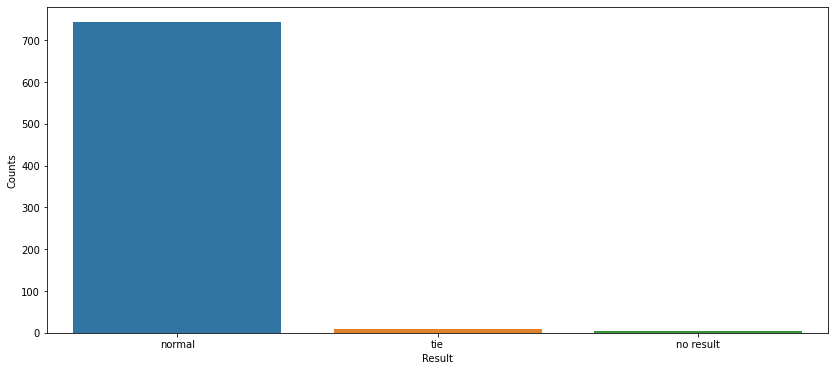

In [12]:
#Value counts of the result

result_label = df["result"].value_counts()

plt.figure(figsize= (14, 6))
sns.barplot(result_label.index, result_label)
plt.xlabel("Result")
plt.ylabel("Counts");

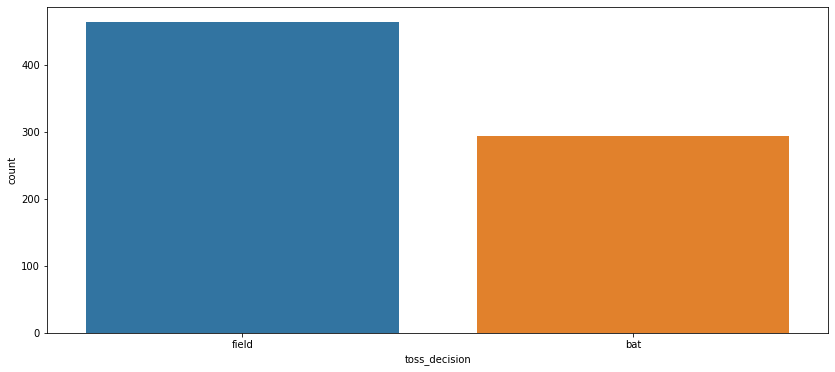

In [13]:
# count plot of the toss_decision

plt.figure(figsize= (14, 6))
sns.countplot(df.toss_decision);

In [14]:
# group by winners

df.groupby("winner")["toss_decision"].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              52
                             field            48
Deccan Chargers              field            15
                             bat              14
Delhi Capitals               field             8
                             bat               2
Delhi Daredevils             field            38
                             bat              29
Gujarat Lions                field            11
                             bat               2
Kings XI Punjab              field            61
                             bat              21
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            57
                             bat              35
Mumbai Indians               field            64
                             bat              45
Pune Warriors                bat               9
                             field             3
Rajasthan Royals          

In [15]:
# teams did the fielding first and the result is normal

df[(df["toss_decision"] == "field") & (df["result"] == "normal")].head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


Text(0, 0.5, 'Teams')

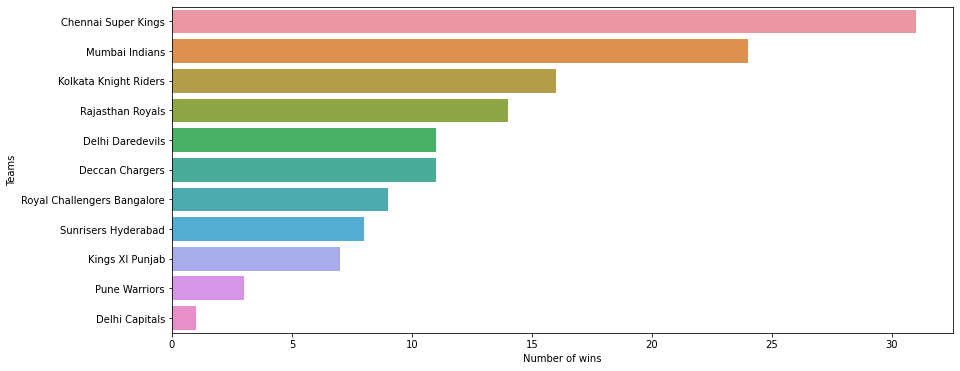

In [16]:
#teams did bating first and wins th match

win = df[(df["toss_decision"] == "bat") & (df["win_by_runs"] != 0)]["winner"].value_counts().sort_values(ascending = False)

plt.figure(figsize= (14, 6))
sns.barplot(win, win.index)
plt.xlabel("Number of wins")
plt.ylabel("Teams")

Text(0, 0.5, 'Teams')

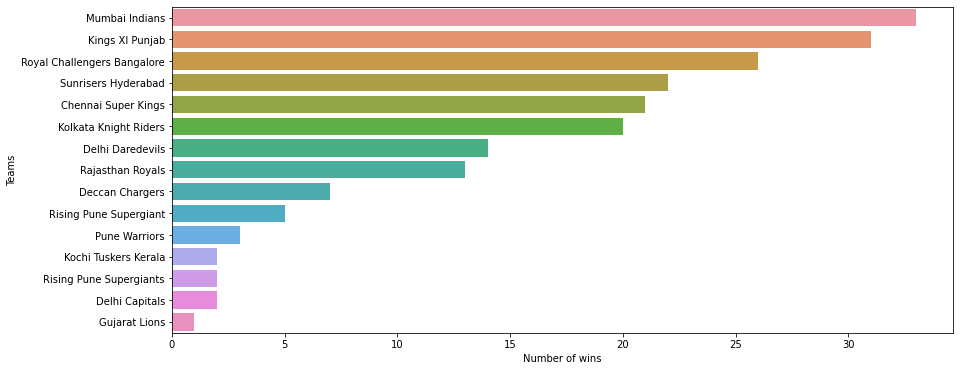

In [17]:
# teams which did the fielding first and also wins the match

win = df[(df["toss_decision"] == "field") & (df["win_by_runs"] != 0)]["winner"].value_counts().sort_values(ascending = False)

plt.figure(figsize= (14, 6))
sns.barplot(win, win.index)
plt.xlabel("Number of wins")
plt.ylabel("Teams")

Text(0, 0.5, 'Number of wickets')

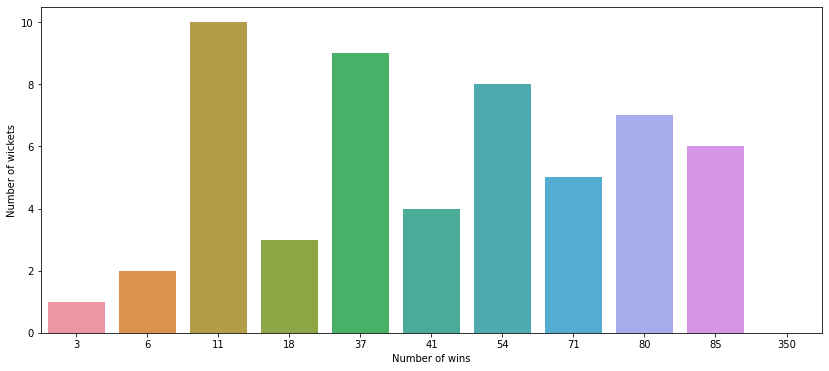

In [18]:
# barplot of win_by_wickets

win_wicket = df["win_by_wickets"].value_counts()

plt.figure(figsize= (14, 6))
sns.barplot(win_wicket, win_wicket.index)
plt.xlabel("Number of wins")
plt.ylabel("Number of wickets")

Text(0, 0.5, 'Number of matches')

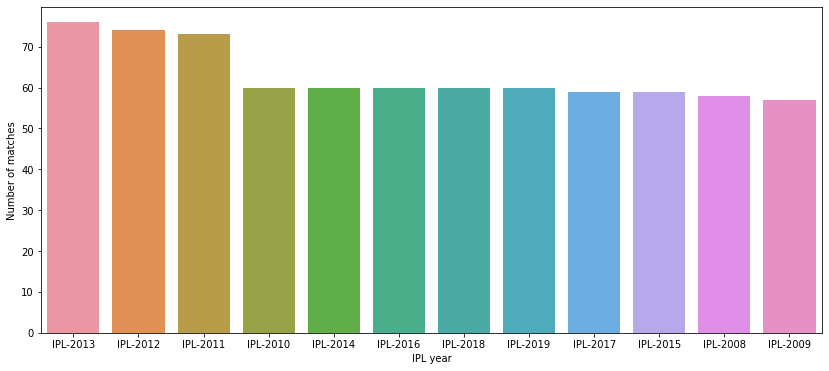

In [19]:
# number of matches played each year

season = df["Season"].value_counts()
plt.figure(figsize= (14, 6))
sns.barplot(season.index, season)
plt.xlabel("IPL year")
plt.ylabel("Number of matches")